In [1]:
#!pip install sqlalchemy pandas matplotlib seaborn

In [88]:
from sqlalchemy import create_engine
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

database_path = "sahayak.db"

engine = create_engine(f"sqlite:///{database_path}")

### View All the Tables

In [4]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, engine)
print(tables)

         name
0        user
1  fundraiser
2    donation


### View all users

In [62]:
query = """
SELECT 
    id AS User_ID, 
    name AS User_Name 
FROM 
    user
"""

user_details = pd.read_sql(query, engine)
user_details.columns = ["User ID", "User Name"]

print(tabulate(user_details, headers="keys", tablefmt="grid"))

+----+-----------+-------------+
|    |   User ID | User Name   |
+====+===========+=============+
|  0 |         1 | Saurbh      |
+----+-----------+-------------+
|  1 |         2 | Mysha       |
+----+-----------+-------------+
|  2 |         3 | Mike        |
+----+-----------+-------------+


### Number of Fundraisers

In [7]:
query = "SELECT COUNT(*) as total_fundraisers FROM fundraiser;"
fundraisers = pd.read_sql(query, engine)
print(fundraisers)

   total_fundraisers
0                  9


### Deleted Fundraisers

In [9]:
query = "SELECT COUNT(*) as total_deleted_fundraisers FROM fundraiser WHERE flag = 'deleted';"
deleted_fundraisers = pd.read_sql(query, engine)
print(deleted_fundraisers)

   total_deleted_fundraisers
0                          1


In [37]:
query = """
SELECT 
    f.id AS Fundraiser_ID,
    u.name AS User_Name,
    f.title AS Fundraiser_Title,
    f.total_donated AS Total_Donated,
    f.goal AS Goal_Amount
FROM 
    fundraiser f
JOIN 
    user u
ON 
    f.user_id = u.id
WHERE 
    f.flag = 'deleted'
"""

deleted_fundraisers = pd.read_sql(query, engine)
deleted_fundraisers.columns = ["Fundraiser ID", "User Name", "Fundraiser Title", "Total Donated", "Goal Amount"]

# Print the result in tabular format
print(tabulate(deleted_fundraisers, headers='keys', tablefmt='grid'))

+----+-----------------+-------------+--------------------+-----------------+---------------+
|    |   Fundraiser ID | User Name   | Fundraiser Title   |   Total Donated |   Goal Amount |
+====+=================+=============+====================+=================+===============+
|  0 |               4 | Saurbh      | Medical treatment  |            5000 |         10000 |
+----+-----------------+-------------+--------------------+-----------------+---------------+


### Active Fundraisers

In [66]:
query = """
SELECT 
    f.id AS Fundraiser_ID,
    u.name AS User_Name,
    f.title AS Fundraiser_Title,
    f.total_donated AS Total_Donated,
    f.goal AS Goal_Amount
FROM 
    fundraiser f
JOIN 
    user u
ON 
    f.user_id = u.id
WHERE 
    f.flag = 'active'
"""

deleted_fundraisers = pd.read_sql(query, engine)
deleted_fundraisers.columns = ["Fundraiser ID", "User Name", "Fundraiser Title", "Total Donated", "Goal Amount"]

print(tabulate(deleted_fundraisers, headers='keys', tablefmt='grid'))

+----+-----------------+-------------+--------------------+-----------------+---------------+
|    |   Fundraiser ID | User Name   | Fundraiser Title   |   Total Donated |   Goal Amount |
+====+=================+=============+====================+=================+===============+
|  0 |               1 | Saurbh      | Fee Payment        |           10000 |         40000 |
+----+-----------------+-------------+--------------------+-----------------+---------------+
|  1 |               2 | Saurbh      | Computer           |           20000 |        100000 |
+----+-----------------+-------------+--------------------+-----------------+---------------+
|  2 |               3 | Saurbh      | Animal Shelter     |          120000 |        200000 |
+----+-----------------+-------------+--------------------+-----------------+---------------+
|  3 |               7 | Mike        | Phone              |           20000 |         40000 |
+----+-----------------+-------------+--------------------+-

### Completed Fundraisers

In [70]:
query = """
SELECT 
    f.id AS Fundraiser_ID,
    u.name AS User_Name,
    f.title AS Fundraiser_Title,
    f.total_donated AS Total_Donated,
    f.goal AS Goal_Amount
FROM 
    fundraiser f
JOIN 
    user u
ON 
    f.user_id = u.id
WHERE 
    f.flag = 'finished'
"""

deleted_fundraisers = pd.read_sql(query, engine)
deleted_fundraisers.columns = ["Fundraiser ID", "User Name", "Fundraiser Title", "Total Donated", "Goal Amount"]

print(tabulate(deleted_fundraisers, headers='keys', tablefmt='grid'))

+----+-----------------+-------------+--------------------+-----------------+---------------+
|    |   Fundraiser ID | User Name   | Fundraiser Title   |   Total Donated |   Goal Amount |
+====+=================+=============+====================+=================+===============+
|  0 |               5 | Mike        | Park Renovation    |           10000 |         10000 |
+----+-----------------+-------------+--------------------+-----------------+---------------+
|  1 |               6 | Mysha       | Books              |            4000 |          4000 |
+----+-----------------+-------------+--------------------+-----------------+---------------+


### Total Donations Made

In [72]:
query = "SELECT SUM(amount) as total_donations FROM donation;"
total_donations = pd.read_sql(query, engine)
print(total_donations)

   total_donations
0         216000.0


### Top Donors

In [101]:
query = """
SELECT 
    user.name AS User_Name,
    donation.user_id AS User_ID,
    SUM(donation.amount) AS Total_Donated
FROM 
    donation
JOIN 
    user
ON 
    donation.user_id = user.id
GROUP BY 
    donation.user_id, user.name
ORDER BY 
    Total_Donated DESC
LIMIT 5;
"""

top_donors = pd.read_sql(query, engine)
top_donors.columns = ["User Name", "User ID", "Total Donated"]

from tabulate import tabulate
print(tabulate(top_donors, headers="keys", tablefmt="grid"))

+----+-------------+-----------+-----------------+
|    | User Name   |   User ID |   Total Donated |
+====+=============+===========+=================+
|  0 | Mysha       |         2 |           99000 |
+----+-------------+-----------+-----------------+
|  1 | Mike        |         3 |           89000 |
+----+-------------+-----------+-----------------+
|  2 | Saurbh      |         1 |           28000 |
+----+-------------+-----------+-----------------+


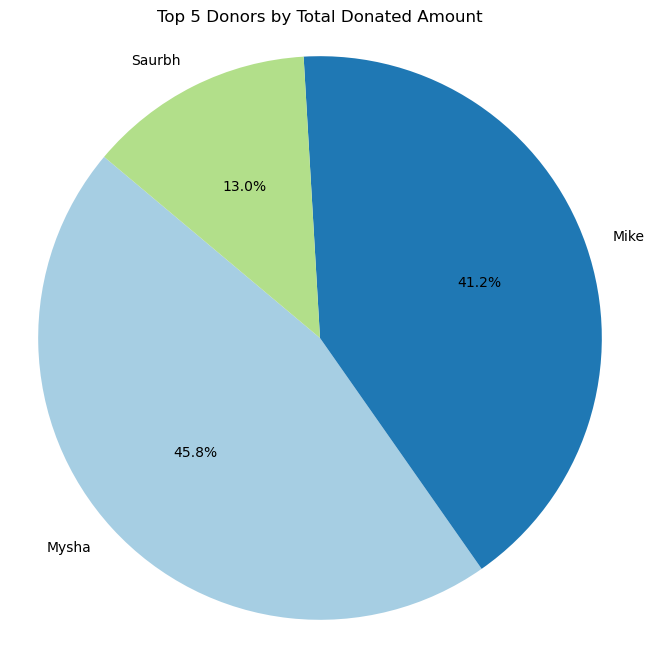

In [105]:
plt.figure(figsize=(8, 8))
plt.pie(
    top_donors['Total Donated'], 
    labels=top_donors['User Name'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title("Top 5 Donors by Total Donated Amount")
plt.axis('equal')  # ensures the pie chart is a circle
plt.show()

### Fundraisers by Category

In [129]:
query = """
SELECT 
    category AS Category, 
    COUNT(*) AS Total_Fundraisers, 
    SUM(total_donated) AS Total_Donated 
FROM 
    fundraiser 
GROUP BY 
    category
"""
categories = pd.read_sql(query, engine)

categories.columns = ["Category", "Total Fundraisers", "Total Donated"]
categories.set_index("Category", inplace=True)                                 # Set 'Category' as the index 

print(tabulate(categories, headers="keys", tablefmt="grid"))

+----------------+---------------------+-----------------+
| Category       |   Total Fundraisers |   Total Donated |
+================+=====================+=================+
| Animal Welfare |                   2 |          130000 |
+----------------+---------------------+-----------------+
| Education      |                   4 |           54000 |
+----------------+---------------------+-----------------+
| Environment    |                   1 |           10000 |
+----------------+---------------------+-----------------+
| Health         |                   2 |           22000 |
+----------------+---------------------+-----------------+


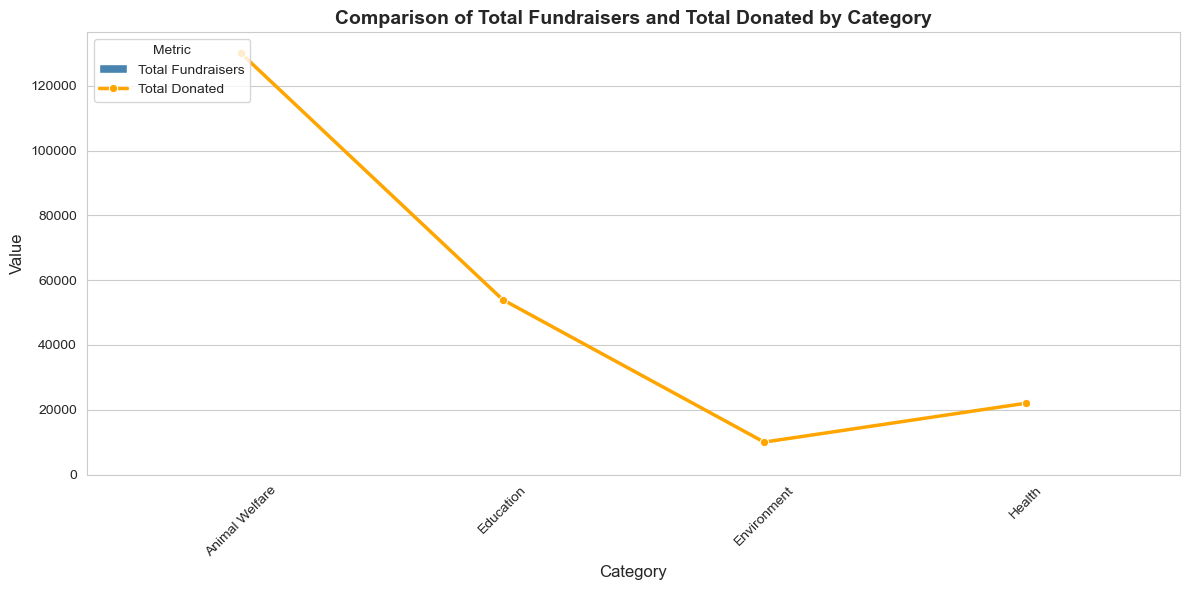

In [127]:
query = """
SELECT 
    category AS Category, 
    COUNT(*) AS Total_Fundraisers, 
    SUM(total_donated) AS Total_Donated 
FROM 
    fundraiser 
GROUP BY 
    category
"""
categories = pd.read_sql(query, engine)

categories.columns = ["Category", "Total Fundraisers", "Total Donated"]

categories_melted = categories.melt(id_vars="Category", var_name="Metric", value_name="Value")

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.barplot(
    x="Category", 
    y="Value", 
    hue="Metric", 
    data=categories_melted[categories_melted["Metric"] == "Total Fundraisers"],
    palette="Blues_d"
)

ax = sns.lineplot(
    x="Category", 
    y="Value", 
    data=categories_melted[categories_melted["Metric"] == "Total Donated"],
    color="orange", 
    linewidth=2.5, 
    marker="o",
    label="Total Donated"
)

plt.title("Comparison of Total Fundraisers and Total Donated by Category", fontsize=14, weight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(title="Metric", loc="upper left", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

### Viewing All Fundraisers

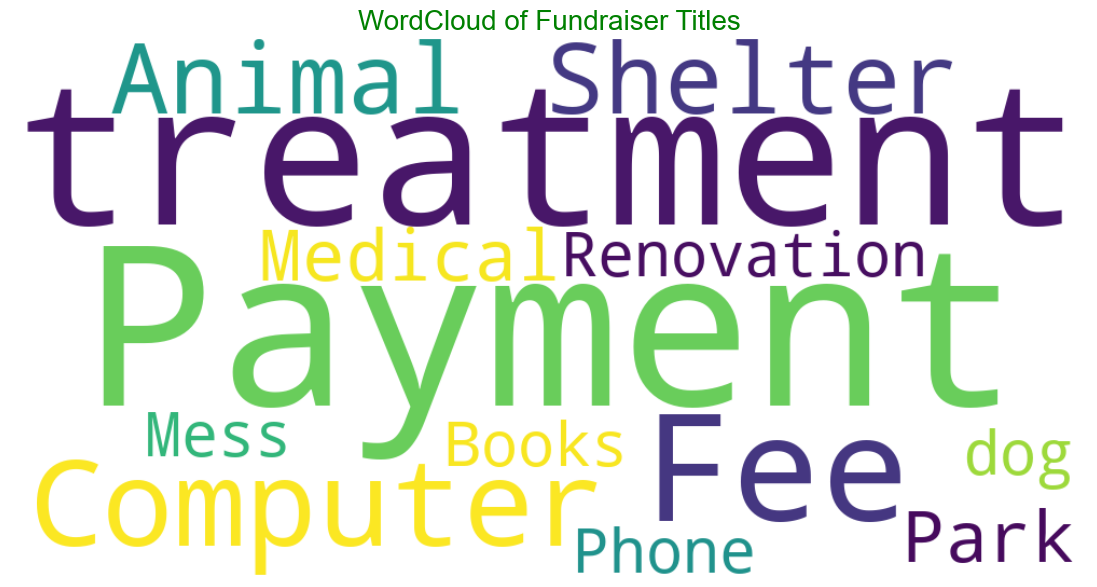

In [163]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

query = "SELECT title FROM fundraiser;"
fundraiser_titles = pd.read_sql(query, engine)

text = " ".join(fundraiser_titles["title"].dropna().tolist())

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    colormap="viridis",
    max_words=200,
    contour_color="black"
).generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Fundraiser Titles", fontsize=20, color="green")
plt.show()

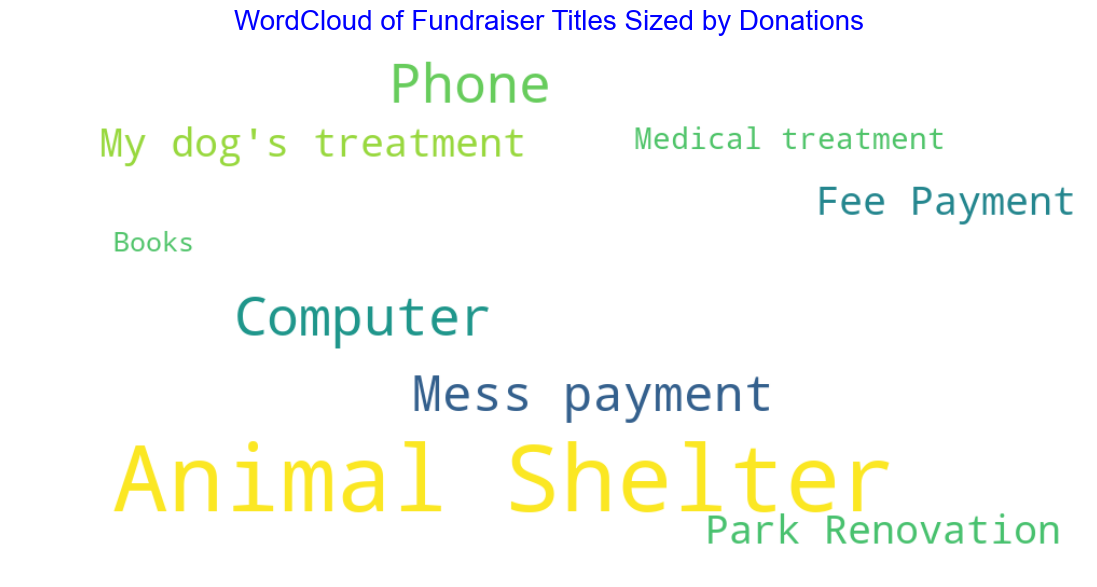

In [159]:
from wordcloud import WordCloud

query = "SELECT title, total_donated FROM fundraiser;"
fundraisers = pd.read_sql(query, engine)

# Dictionary with titles and their corresponding total donated amounts
title_donations = (
    fundraisers
    .set_index("title")["total_donated"]
    .to_dict()
)

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    colormap="viridis",
    contour_color="black"
).generate_from_frequencies(title_donations)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Fundraiser Titles Sized by Donations", fontsize=20, color="blue")
plt.show()

In [132]:
query = """
SELECT 
    id AS Fundraiser_ID,
    title AS Fundraiser_Title,
    total_donated AS Total_Donated,
    goal AS Goal_Amount,
    flag AS Status
FROM 
    fundraiser
"""

finished_fundraisers = pd.read_sql(query, engine)
finished_fundraisers.columns = ["Fundraiser ID", "Fundraiser Title", "Total Donated", "Goal Amount", "Status"]

print(tabulate(finished_fundraisers, headers='keys', tablefmt='grid'))

+----+-----------------+--------------------+-----------------+---------------+----------+
|    |   Fundraiser ID | Fundraiser Title   |   Total Donated |   Goal Amount | Status   |
+====+=================+====================+=================+===============+==========+
|  0 |               1 | Fee Payment        |           10000 |         40000 | active   |
+----+-----------------+--------------------+-----------------+---------------+----------+
|  1 |               2 | Computer           |           20000 |        100000 | active   |
+----+-----------------+--------------------+-----------------+---------------+----------+
|  2 |               3 | Animal Shelter     |          120000 |        200000 | active   |
+----+-----------------+--------------------+-----------------+---------------+----------+
|  3 |               4 | Medical treatment  |            5000 |         10000 | deleted  |
+----+-----------------+--------------------+-----------------+---------------+----------+

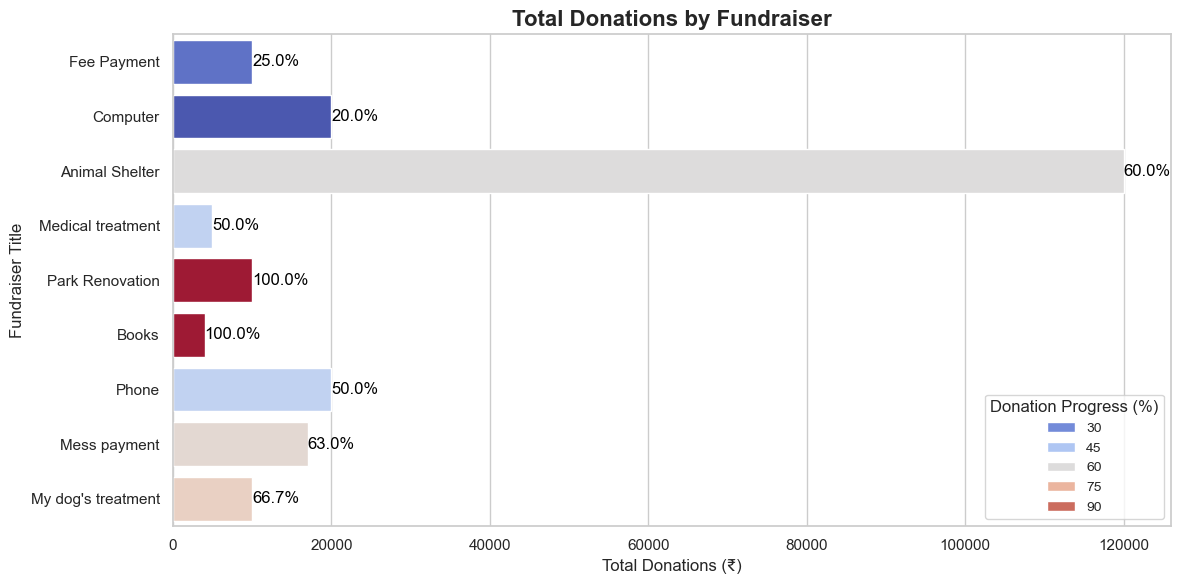

In [136]:
# Calculate the donation progress percentage
finished_fundraisers["Donation Progress (%)"] = (finished_fundraisers["Total Donated"] / finished_fundraisers["Goal Amount"]) * 100

# Set the Fundraiser Title as the index
finished_fundraisers.set_index("Fundraiser Title", inplace=True)

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

bar_plot = sns.barplot(
    x="Total Donated", 
    y=finished_fundraisers.index, 
    data=finished_fundraisers, 
    palette="coolwarm", 
    hue=finished_fundraisers["Donation Progress (%)"]
)

for index, row in finished_fundraisers.iterrows():
    plt.text(
        row["Total Donated"] + 0.02,  # Slight offset from the bar
        index, 
        f"{row['Donation Progress (%)']:.1f}%", 
        color="black", 
        va="center"
    )

plt.title("Total Donations by Fundraiser", fontsize=16, weight="bold")
plt.xlabel("Total Donations (₹)", fontsize=12)
plt.ylabel("Fundraiser Title", fontsize=12)
plt.legend(title="Donation Progress (%)", loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()

### To update the flag for fundraisers where goal has reached

In [75]:
#from sqlalchemy import text

# Define the query to update the flag for finished fundraisers
#update_query = text("""
#    UPDATE fundraiser
#    SET flag = 'finished'
#    WHERE total_donated >= goal
#    and flag == 'active';
#""")

# Execute the query
#with engine.connect() as conn:
#    conn.execute(update_query)
#    conn.commit()  # Explicitly commit changes

# Commit the changes to save them in the database
#engine.dispose()

#print("Flags updated successfully for fundraisers with total_donated >= goal.")

Flags updated successfully for fundraisers with total_donated >= goal.


### Fundraisers by Categories

C:\Users\liger\AppData\Local\Temp\ipykernel_24036\893136755.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total', y='category', data=data, hue=None, palette="magma", legend=False)


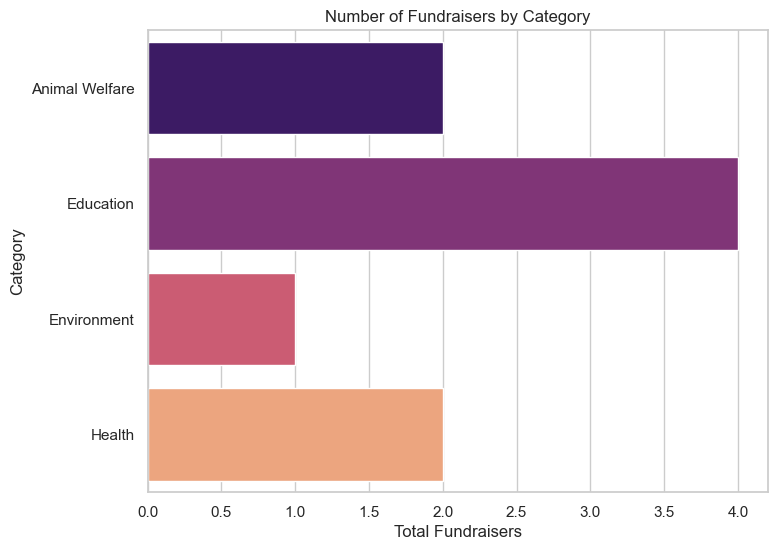

In [153]:
query = "SELECT category, COUNT(*) as total FROM fundraiser GROUP BY category;"
data = pd.read_sql(query, engine)

plt.figure(figsize=(8, 6))
sns.barplot(x='total', y='category', data=data, hue=None, palette="magma", legend=False)
plt.title("Number of Fundraisers by Category")
plt.xlabel("Total Fundraisers")
plt.ylabel("Category")
plt.show()

### Top Donors

C:\Users\liger\AppData\Local\Temp\ipykernel_24036\1702743823.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_donated', y='user_id', data=data, palette="coolwarm")


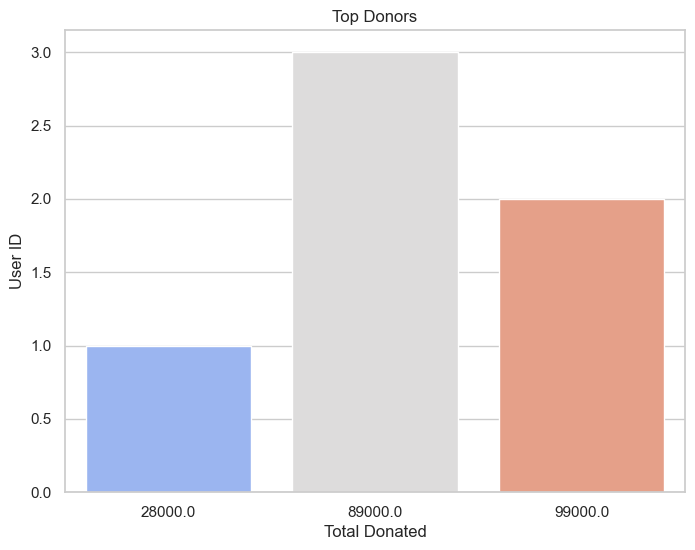

In [145]:
query = """
SELECT user_id, SUM(amount) as total_donated 
FROM donation 
GROUP BY user_id 
ORDER BY total_donated DESC 
LIMIT 5;
"""
data = pd.read_sql(query, engine)

plt.figure(figsize=(8, 6))
sns.barplot(x='total_donated', y='user_id', data=data, palette="coolwarm")
plt.title("Top Donors")
plt.xlabel("Total Donated")
plt.ylabel("User ID")
plt.show()